# Yahoo Data Analysis 

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
df = pd.read_csv("yahoo_data.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1258 non-null   object
 1   Open       1258 non-null   object
 2   High       1258 non-null   object
 3   Low        1258 non-null   object
 4   Close      1258 non-null   object
 5   Adj Close  1258 non-null   object
 6   Volume     1258 non-null   object
dtypes: object(7)
memory usage: 68.9+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
count,1258,1258,1258,1258,1258,1258,1258
unique,1258,1258,1258,1255,1255,1255,1219
top,"Apr 28, 2023","33,797.43","34,104.56","35,290.12","32,798.40","32,798.40","301,750,000"
freq,1,1,1,2,2,2,3


In [179]:
#check Null Values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [180]:
#Remove Duplicates
df.drop_duplicates()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Apr 28, 2023","33,797.43","34,104.56","33,728.40","34,098.16","34,098.16","354,310,000"
1,"Apr 27, 2023","33,381.66","33,859.75","33,374.65","33,826.16","33,826.16","343,240,000"
2,"Apr 26, 2023","33,596.34","33,645.83","33,235.85","33,301.87","33,301.87","321,170,000"
3,"Apr 25, 2023","33,828.34","33,875.49","33,525.39","33,530.83","33,530.83","297,880,000"
4,"Apr 24, 2023","33,805.04","33,891.15","33,726.09","33,875.40","33,875.40","252,020,000"
...,...,...,...,...,...,...,...
1253,"May 07, 2018","24,317.66","24,479.45","24,263.42","24,357.32","24,357.32","307,670,000"
1254,"May 04, 2018","23,865.22","24,333.35","23,778.87","24,262.51","24,262.51","329,480,000"
1255,"May 03, 2018","23,836.23","23,996.15","23,531.31","23,930.15","23,930.15","389,240,000"
1256,"May 02, 2018","24,097.63","24,185.52","23,886.30","23,924.98","23,924.98","385,350,000"


In [181]:
#Check Data Types
df.dtypes

Date         object
Open         object
High         object
Low          object
Close        object
Adj Close    object
Volume       object
dtype: object

# Convert Data Type 

In [182]:
df["Date"]= pd.to_datetime(df["Date"])

In [183]:
df["Open"]= df["Open"].str.replace(",","").astype(float)

In [184]:
df["High"]= df["High"].str.replace(",","").astype(float)

In [185]:
df["Low"]= df["Low"].str.replace(",","").astype(float)

In [186]:
df["Close"]= df["Close"].str.replace(",","").astype(float)

In [187]:
df["Adj Close"] = df["Adj Close"].str.replace(",","").astype(float)

In [188]:
df["Volume"] = df["Volume"].str.replace(",","").astype(int)

In [189]:
#Check Data Types
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

# Exploratory Data Analysis (EDA)

In [190]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,2020-10-28 09:39:12.305246464,29595.823045,29776.945739,29402.432226,29599.361677,29599.361677,3.450636e+08
min,2018-05-01 00:00:00,19028.360000,19121.010000,18213.650000,18591.930000,18591.930000,8.615000e+07
25%,2019-07-31 06:00:00,26041.267500,26163.155000,25877.872500,26027.120000,26027.120000,2.773125e+08
50%,2020-10-27 12:00:00,29201.410000,29335.685000,28996.500000,29199.460000,29199.460000,3.247250e+08
75%,2022-01-26 18:00:00,33604.027500,33825.445000,33346.827500,33600.342500,33600.342500,3.875100e+08
max,2023-04-28 00:00:00,36722.600000,36952.650000,36636.000000,36799.650000,36799.650000,9.159900e+08
std,NaN,4006.078299,4009.007573,4004.949066,4007.468822,4007.468822,1.069142e+08


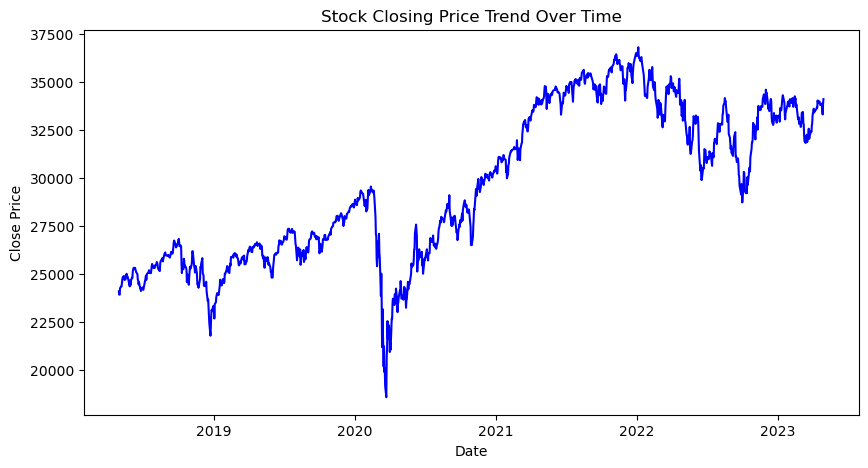

In [191]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Stock Closing Price Trend Over Time')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.show()

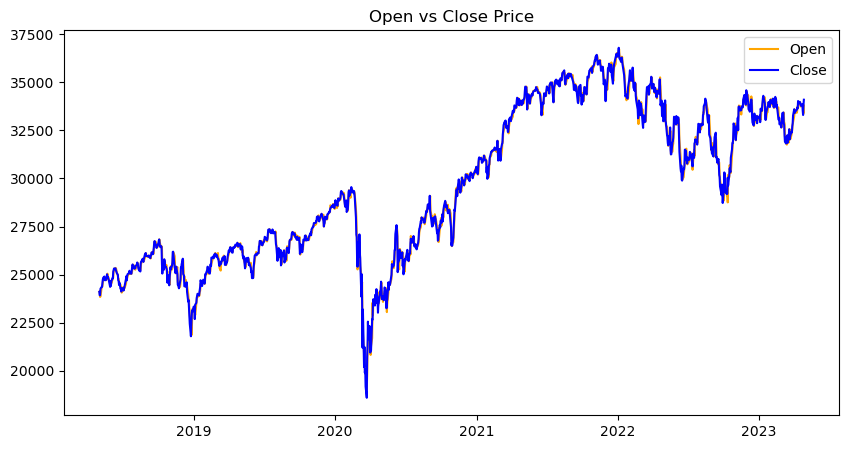

In [192]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Open'], label='Open', color='orange')
plt.plot(df['Date'], df['Close'], label='Close', color='blue')
plt.legend(); plt.title('Open vs Close Price')
plt.show()

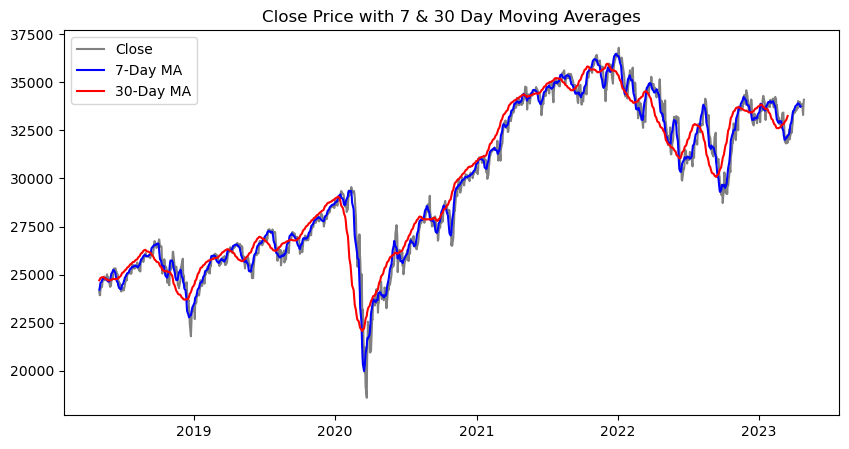

In [193]:
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label='Close', color='gray')
plt.plot(df['Date'], df['MA7'], label='7-Day MA', color='blue')
plt.plot(df['Date'], df['MA30'], label='30-Day MA', color='red')
plt.legend(); plt.title('Close Price with 7 & 30 Day Moving Averages')
plt.show()

In [194]:
df.sort_values('Volume', ascending=False).head(10)[['Date','Volume','Close']]

,Date,Volume,Close
797,2020-02-28,915990000,25409.36
788,2020-03-12,908260000,21200.62
1094,2018-12-21,900510000,22445.37
782,2020-03-20,872290000,19173.98
784,2020-03-18,871360000,19898.92
787,2020-03-13,843080000,23185.62
531,2021-03-19,811890000,32627.97
780,2020-03-24,799340000,20704.91
779,2020-03-25,796320000,21200.55
785,2020-03-17,793060000,21237.38


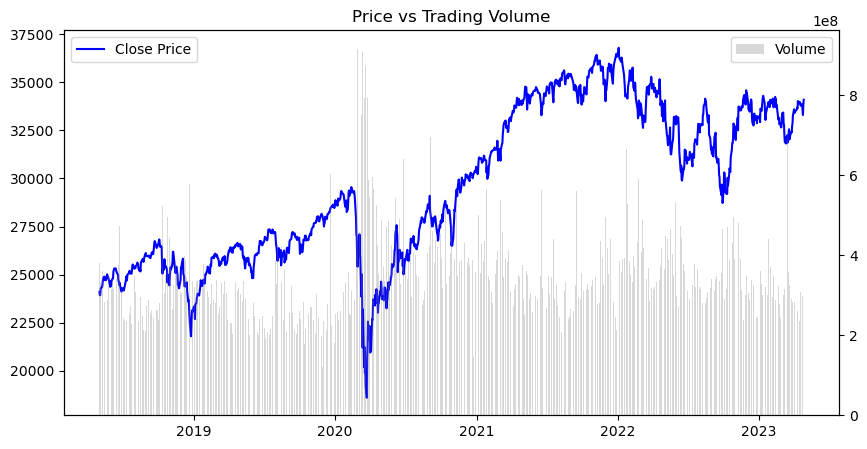

In [199]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(df['Date'], df['Close'], color='blue', label='Close Price')
ax2 = ax1.twinx()
ax2.bar(df['Date'], df['Volume'], alpha=0.3, color='gray', label='Volume')
ax1.legend(loc='upper left'); ax2.legend(loc='upper right')
plt.title('Price vs Trading Volume')
plt.show()

In [200]:
df['Daily Return'] = df['Close'].pct_change() * 100

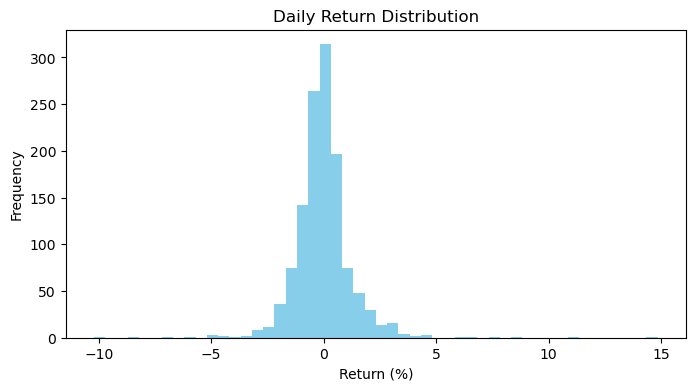

In [201]:
plt.figure(figsize=(8,4))
plt.hist(df['Daily Return'].dropna(), bins=50, color='skyblue')
plt.title('Daily Return Distribution')
plt.xlabel('Return (%)'); plt.ylabel('Frequency')
plt.show()

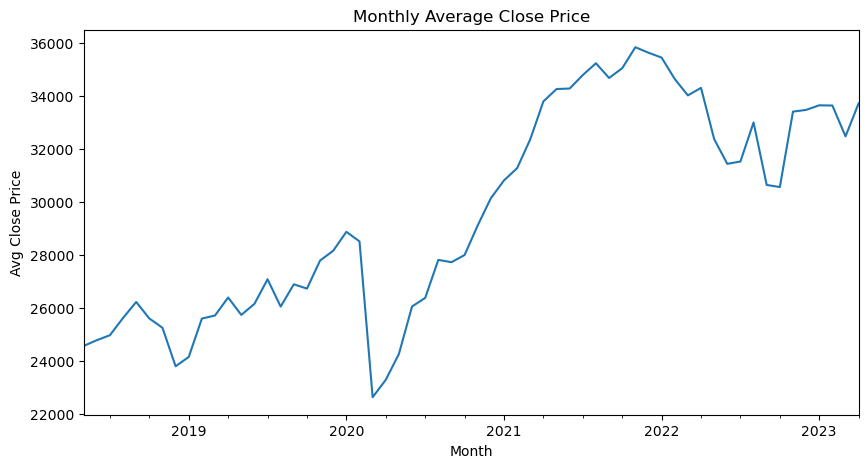

In [202]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('Month')['Close'].mean()
monthly_avg.plot(figsize=(10,5), title='Monthly Average Close Price')
plt.xlabel('Month'); plt.ylabel('Avg Close Price')
plt.show()

# Feature Engineering

In [204]:
df['Daily Return'] = (df['Close'] - df['Open']) / df['Open'] * 100

In [205]:
df['Price Range'] = df['High'] - df['Low']

In [206]:
df['Volatility'] = df['Close'].rolling(window=7).std()

In [208]:
df['Trend'] = df['Close'].diff().apply(lambda x: 'Up' if x > 0 else 'Down')

In [209]:
df['Cumulative Return'] = (1 + df['Daily Return']/100).cumprod() - 1

In [210]:
df[['Date','Open','Close','Daily Return','Price Range','Volatility','Trend','Cumulative Return']].head()

,Date,Open,Close,Daily Return,Price Range,Volatility,Trend,Cumulative Return
0,2023-04-28,33797.43,34098.16,0.889801,376.16,NaN,Down,0.008898
1,2023-04-27,33381.66,33826.16,1.331569,485.10,NaN,Down,0.022332
2,2023-04-26,33596.34,33301.87,-0.876494,409.98,NaN,Down,0.013372
3,2023-04-25,33828.34,33530.83,-0.879470,350.10,NaN,Up,0.004459
4,2023-04-24,33805.04,33875.40,0.208135,165.06,NaN,Up,0.006550
